# Problem Statement:

An airline company, like all other businesses, seeks to maximize its profits. Needless to say, customers' satisfaction plays an important role in boosting revenues and profits. This dataset contains the airline passenger satisfaction survey. It wants to see what factors are highly correlated to a satisfied (or dissatisfied) passenger. Also, the company would like to predict passenger satisfaction.

In [1]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#chabging directory
os.chdir(r'Downloads')

In [4]:
# loading csv data to dataframe 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#Concatenating the two datasets
df = pd.concat([train, test])

#Getting the shape of train,test and df
train.shape , test.shape,df.shape 

((103904, 25), (25976, 25), (129880, 25))

In [6]:
# Getting aa copy of df
df_orginal=df.copy()

# Exploratory Data Analysis (EDA)

In [7]:
# Getting familiar with data
df.shape


(129880, 25)

In [8]:
# Getting the head of data
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
# Getting the tail of the data
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

## Dropping irrelevant columns

We have two columns that are useless in our analysis. These two columns are 'id' and 'Unnamed:0'.

In [11]:
df.drop(labels=['Unnamed: 0', 'id'], axis=1, inplace=True)

## Handling duplicate rows

In [12]:
df.duplicated().sum(),train.duplicated().sum(),test.duplicated().sum()

(0, 0, 0)

## Getting the number of missing values

In [13]:
df.apply(lambda x: sum(x.isnull())) 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

As we see, the only column with missing values is 'Arrival Delay in Minutes' (393 missing values). I calculate the percentage of missing values for this column first and do take the appropriate approach accordingly.

In [14]:
null_values = df['Arrival Delay in Minutes'].isnull().sum()
per_null = round((null_values / df.shape[0])*100,2)
print(f'The percentage of null values is: {per_null}%')

The percentage of null values is: 0.3%


Missing values comprise a tiny percentage of the total data (only 0.3%), So I just drop them.

In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    12948

## Checking the number of unique values in each column

In [17]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
satisfaction                            2
dtype: int64

## Univariate Analysis

### The statistical summary of the dataset

In [18]:
#data descrition
df.describe(include='all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129487,129487,129487.000000,129487,129487,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,65703,105773,NaN,89445,61990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73225
mean,NaN,NaN,39.428761,NaN,NaN,1190.210662,2.728544,3.057349,2.756786,2.976909,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,NaN
std,NaN,NaN,15.117597,NaN,NaN,997.560954,1.329235,1.526787,1.401662,1.278506,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [19]:
df.astype('object').describe().transpose()

,count,unique,top,freq
Gender,129487,2,Female,65703
Customer Type,129487,2,Loyal Customer,105773
Age,129487,75,39,3681
Type of Travel,129487,2,Business travel,89445
Class,129487,3,Business,61990
Flight Distance,129487,3821,337,840
Inflight wifi service,129487,6,2,32236
Departure/Arrival time convenient,129487,6,4,31786
Ease of Online booking,129487,6,3,30297
Gate location,129487,6,3,35611


Several features have 6 levels (from 0 to 5); interestingly in most of them '4' is the most chosen answer.

In [20]:
#Find the Frequency of each items(levels)
#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.apply(lambda x:print( x.value_counts()))

Female    65703
Male      63784
Name: Gender, dtype: int64
Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64
Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64
Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64
neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64


Gender            None
Customer Type     None
Type of Travel    None
Class             None
satisfaction      None
dtype: object

### Target: satisfaction

In [21]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

Text(0, 0.5, 'Frequancy')

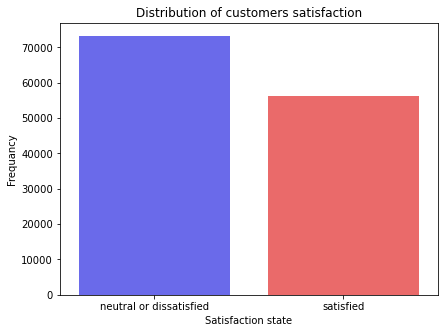

In [22]:
#Visualizing satisfaction
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['satisfaction'], palette='seismic', order=df['satisfaction'].value_counts().index)
plt.title('Distribution of customers satisfaction')
plt.xlabel('Satisfaction state')
plt.ylabel('Frequancy')

([<matplotlib.patches.Wedge at 0x1b4bfa12e20>,
 [Text(-1.1257379374310423, -0.2349767993409191, 'neutral or dissatisfied'),
  Text(1.1257379374310423, 0.23497679934091947, 'satisfied')],
 [Text(-0.6362866602871109, -0.1328129735405195, '56.55%'),
  Text(0.6362866602871109, 0.13281297354051969, '43.45%')])

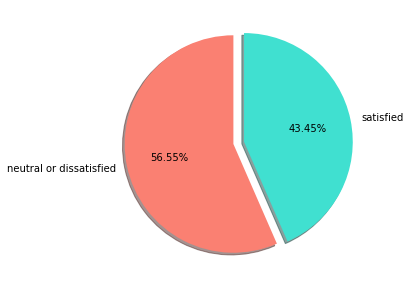

In [23]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['satisfaction'].value_counts().values,
        labels=df['satisfaction'].value_counts().index,
        startangle=90,
        colors=['salmon' , 'turquoise'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

As we see, 43.45% of customers have been satisfied and the rest are either neutral or dissatisfied. 
Therefore, in this dataset we do not see a big imbalance in target distribution.

Now, it is time to convert satisfaction levels to 0 and 1:

In [24]:
df['satisfaction'].replace('neutral or dissatisfied',0,inplace=True)
df['satisfaction'].replace('satisfied',1,inplace=True)

### Gender

In [25]:
df['Gender'].value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

Text(0, 0.5, 'Frequancy')

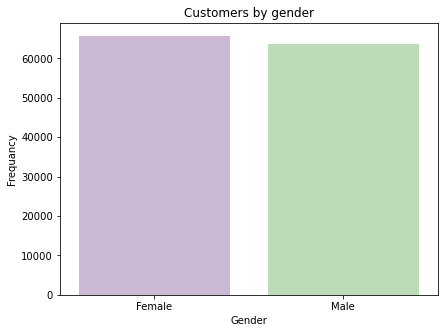

In [26]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Gender'], palette='PRGn', order=df['Gender'].value_counts().index)
plt.title('Customers by gender')
plt.xlabel('Gender')
plt.ylabel('Frequancy')

([<matplotlib.patches.Wedge at 0x1b4c097b220>,
 [Text(-1.1496884102221683, -0.02676862717480471, 'Female'),
  Text(1.149688412728423, 0.026768519533207025, 'Male')],
 [Text(-0.6498238840386167, -0.01513009362054179, '50.74%'),
  Text(0.6498238854551955, 0.015130032779638751, '49.26%')])

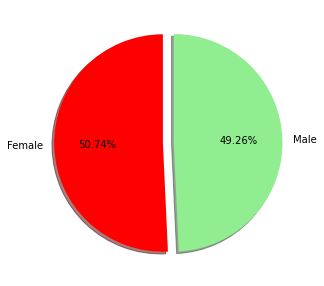

In [27]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Gender'].value_counts().values,
        labels=df['Gender'].value_counts().index,
        startangle=90,
        colors=['red' , 'lightgreen'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

### Customer Type

In [28]:
df['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

Text(0, 0.5, 'Frequancy')

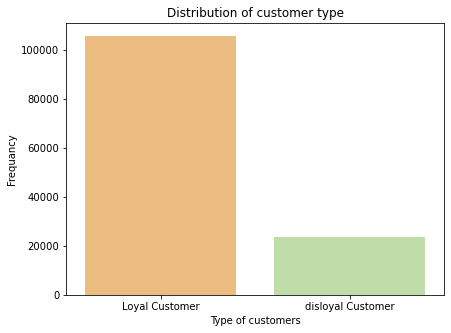

In [29]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Customer Type'], palette='Spectral', order=df['Customer Type'].value_counts().index)
plt.title('Distribution of customer type')
plt.xlabel('Type of customers')
plt.ylabel('Frequancy')


([<matplotlib.patches.Wedge at 0x1b4c0f4fe50>,
 [Text(-0.6257431368933861, -0.964855184279395, 'Loyal Customer'),
  Text(0.6257431368933862, 0.964855184279395, 'disloyal Customer')],
 [Text(-0.35368090346147907, -0.5453529302448753, '81.69%'),
  Text(0.3536809034614792, 0.5453529302448753, '18.31%')])

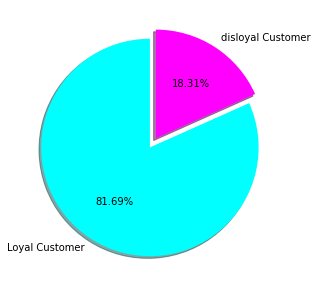

In [30]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Customer Type'].value_counts().values,
        labels=df['Customer Type'].value_counts().index,
        startangle=90,
        colors=['aqua' , 'magenta'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

### Age

In [31]:
df['Age'].describe()

count    129487.000000
mean         39.428761
std          15.117597
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age')

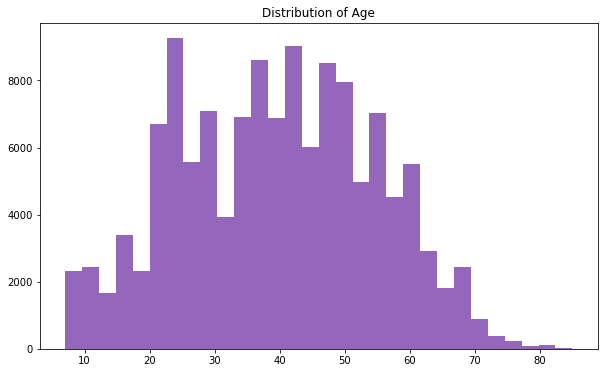

In [32]:
df['Age'].hist(grid=False,
       figsize=(10, 6),color='tab:purple',
       bins=30)
plt.title('Distribution of Age')

<AxesSubplot:xlabel='Age'>

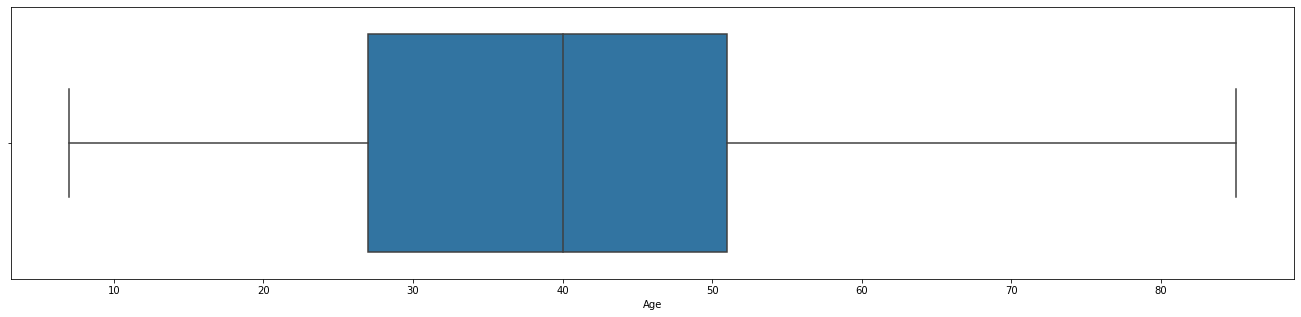

In [33]:
sns.boxplot(df.Age)

### Type of Travel

In [34]:
df['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

Text(0, 0.5, 'Frequancy')

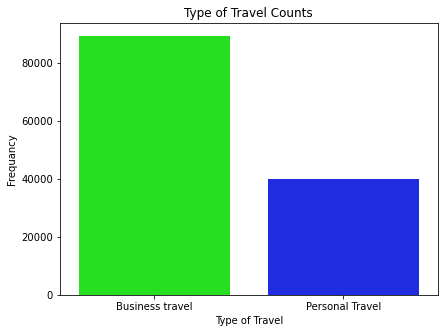

In [35]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Type of Travel'], palette='hsv', order=df['Type of Travel'].value_counts().index)
plt.title('Type of Travel Counts')
plt.xlabel('Type of Travel')
plt.ylabel('Frequancy')

([<matplotlib.patches.Wedge at 0x1b4c11a7640>,
 [Text(-0.9495878301970686, -0.6486778497386999, 'Business travel'),
  Text(0.9495878909306676, 0.6486777608318683, 'Personal Travel')],
 [Text(-0.5367235561983431, -0.36664400202622166, '69.08%'),
  Text(0.5367235905260295, 0.36664395177453424, '30.92%')])

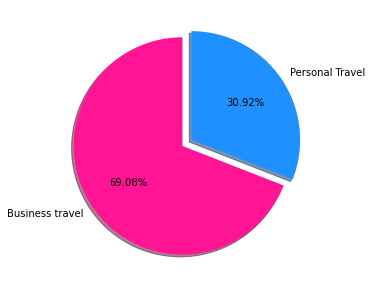

In [36]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Type of Travel'].value_counts().values,
        labels=df['Type of Travel'].value_counts().index,
        startangle=90,
        colors=['deeppink' , 'dodgerblue'],
        explode=[0.05,0.05],
        shadow=True, autopct='%1.2f%%')

### Class

In [37]:
df['Class'].value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

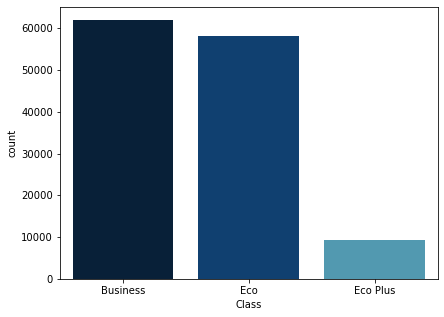

In [38]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Class'], palette='ocean', order=df['Class'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c14b7640>,
 [Text(-1.1474347868694064, 0.07676854747851017, 'Business'),
  Text(1.1005292264588078, -0.33366962958887725, 'Eco'),
  Text(0.25945919998436356, 1.1203485723396422, 'Eco Plus')],
 [Text(-0.648550096926186, 0.04339091814002748, '47.87%'),
  Text(0.6220382584332391, -0.18859587759371318, '44.88%'),
  Text(0.14665085216507504, 0.6332404974093628, '7.24%')])

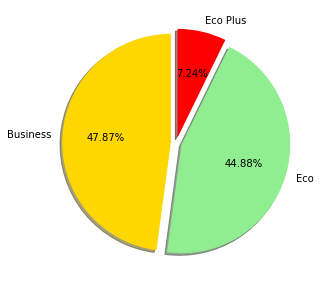

In [39]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Class'].value_counts().values,
        labels=df['Class'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red'],
        explode=[0.05,0.05,0.05],
        shadow=True, autopct='%1.2f%%')

## Flight Distance

In [40]:
df['Flight Distance'].describe()

count    129487.000000
mean       1190.210662
std         997.560954
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

Text(0.5, 1.0, 'Distribution of Flight Distance')

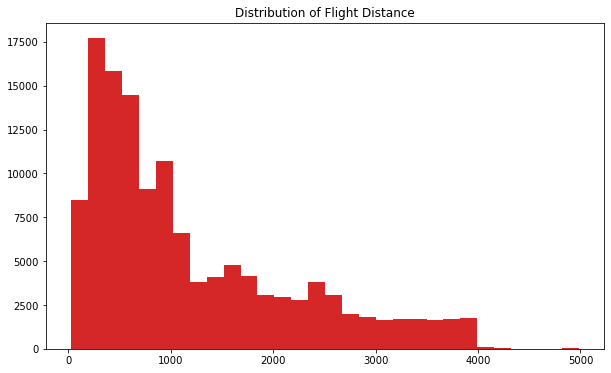

In [41]:
df['Flight Distance'].hist(grid=False,
       figsize=(10, 6),color='tab:red',
       bins=30)
plt.title('Distribution of Flight Distance')

<AxesSubplot:xlabel='Flight Distance'>

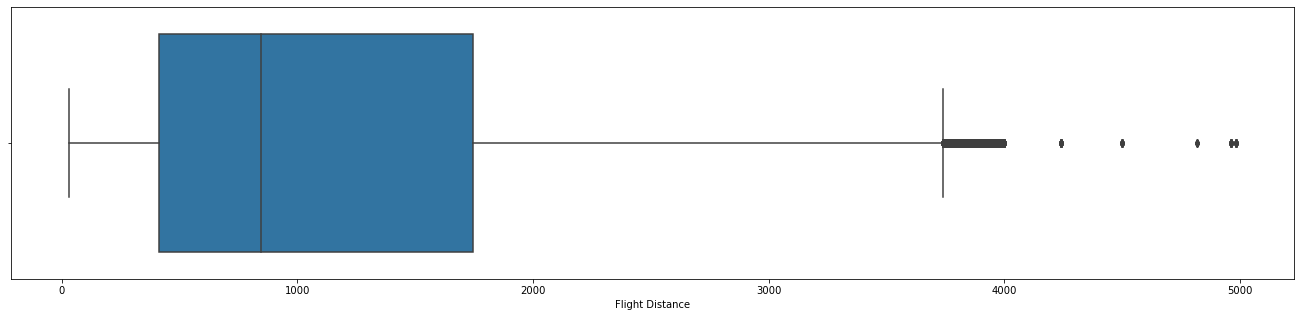

In [42]:
sns.boxplot(df['Flight Distance'])

### Inflight wifi service

In [43]:
df['Inflight wifi service'].value_counts()

2    32236
3    32087
4    24702
1    22250
5    14304
0     3908
Name: Inflight wifi service, dtype: int64

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

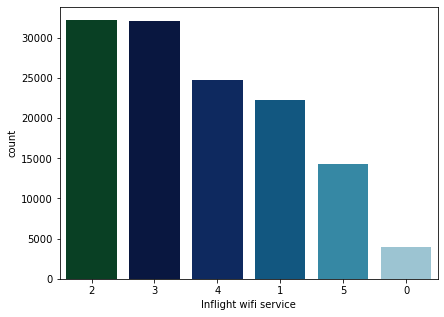

In [44]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Inflight wifi service'], palette='ocean', order=df['Inflight wifi service'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c13ad070>,
 [Text(-0.8104901632253394, 0.8158466126147506, '2'),
  Text(-0.8240727400611924, -0.8021247528209304, '3'),
  Text(0.6291802389462328, -0.9626173834497077, '4'),
  Text(1.1375538316694318, 0.16873434758280342, '1'),
  Text(0.5879704423254023, 0.9883272529641541, '5'),
  Text(0.12307533775433945, 1.2941609101022389, '0')],
 [Text(-0.4581031357360614, 0.46113069408659807, '24.90%'),
  Text(-0.465780244382413, -0.453374860290091, '24.78%'),
  Text(0.3556236133174359, -0.5440880862976608, '19.08%'),
  Text(0.6429652092044613, 0.09537158776419323, '17.18%'),
  Text(0.3323311195752273, 0.5586197516753915, '11.05%'),
  Text(0.07573866938728581, 0.7964067139090701, '3.02%')])

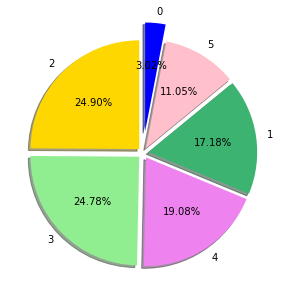

In [45]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Inflight wifi service'].value_counts().values,
        labels=df['Inflight wifi service'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'violet', 'mediumseagreen', 'pink','blue'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Departure/Arrival time convenient

In [46]:
df['Departure/Arrival time convenient'].value_counts()

4    31786
5    27906
3    22302
2    21478
1    19351
0     6664
Name: Departure/Arrival time convenient, dtype: int64

Text(0.5, 1, 'Departure/Arrival time convenient Counts')

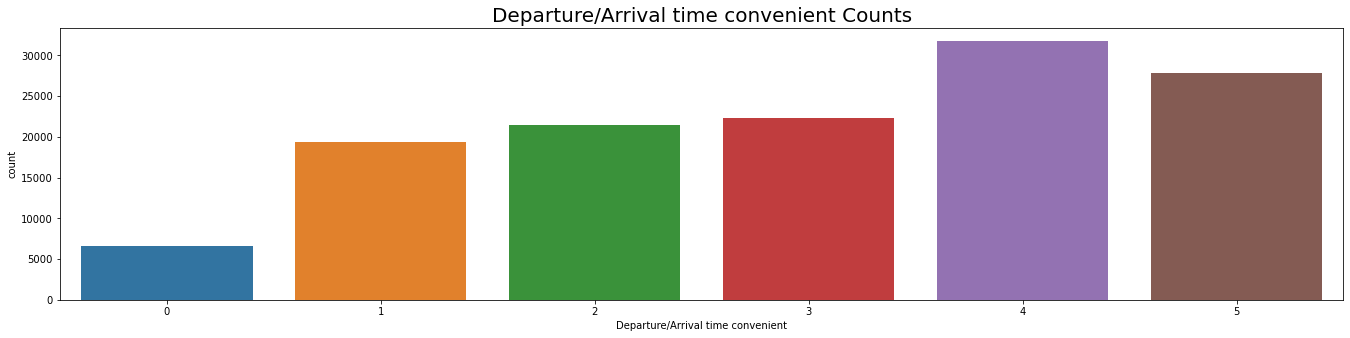

In [47]:
sns.countplot(df['Departure/Arrival time convenient'])
plt.title("Departure/Arrival time convenient Counts", y=1, fontdict={"fontsize": 20})

([<matplotlib.patches.Wedge at 0x1b4c55c00d0>,
 [Text(-0.8015347726522932, 0.824646595960498, '4'),
  Text(-0.9164502979035855, -0.6947077453666612, '5'),
  Text(0.3354181396860586, -1.0999975779834898, '3'),
  Text(1.124098047430064, -0.24270059695830548, '2'),
  Text(0.8192119199171032, 0.8070884897368651, '1'),
  Text(0.20927067767194737, 1.2830455110660433, '0')],
 [Text(-0.4530413932382526, 0.46610459771680324, '24.55%'),
  Text(-0.5179936466411569, -0.39266089955506933, '21.55%'),
  Text(0.18958416590951133, -0.621737761468929, '17.22%'),
  Text(0.6353597659387318, -0.13717859828078133, '16.59%'),
  Text(0.46303282430097137, 0.4561804507208368, '14.94%'),
  Text(0.12878195549042915, 0.7895664683483343, '5.15%')])

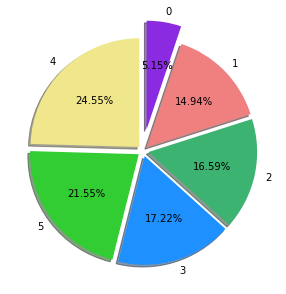

In [48]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Departure/Arrival time convenient'].value_counts().values,
        labels=df['Departure/Arrival time convenient'].value_counts().index,
        startangle=90,
        colors=['khaki', 'limegreen', 'dodgerblue', 'mediumseagreen', 'lightcoral','blueviolet'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Ease of Online booking

In [49]:
df['Ease of Online booking'].value_counts()

3    30297
2    29983
4    24362
1    21808
5    17371
0     5666
Name: Ease of Online booking, dtype: int64

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

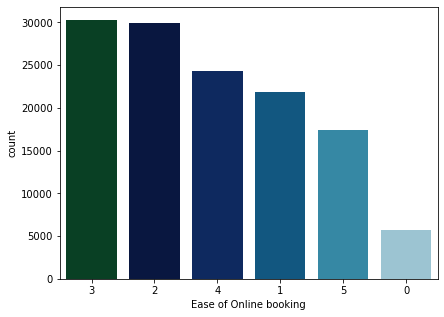

In [50]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Ease of Online booking'], palette='ocean', order=df['Ease of Online booking'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c5867d30>,
 [Text(-0.7712271883169565, 0.8530583942501954, '3'),
  Text(-0.9314163929158831, -0.674509824248369, '2'),
  Text(0.420658429268369, -1.070302053574349, '4'),
  Text(1.146667651454354, -0.08748312470503587, '1'),
  Text(0.7376681837115515, 0.882238998650423, '5'),
  Text(0.17814565537833468, 1.287736046505581, '0')],
 [Text(-0.43591101948349714, 0.48216344022837127, '23.40%'),
  Text(-0.5264527438220208, -0.3812446832708172, '23.16%'),
  Text(0.23776346002125198, -0.6049533346289798, '18.81%'),
  Text(0.6481164986481129, -0.049446983528933314, '16.84%'),
  Text(0.4169428864456595, 0.498656825324152, '13.42%'),
  Text(0.10962809561743672, 0.792452951695742, '4.38%')])

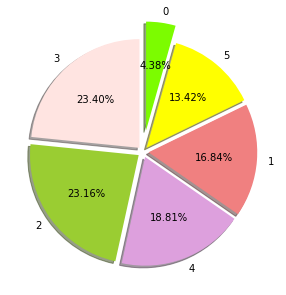

In [51]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Ease of Online booking'].value_counts().values,
        labels=df['Ease of Online booking'].value_counts().index,
        startangle=90,
        colors=['mistyrose', 'yellowgreen', 'plum', 'lightcoral', 'yellow','lawngreen'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Gate location

In [52]:
df['Gate location'].value_counts()

3    35611
4    30376
2    24219
1    21926
5    17354
0        1
Name: Gate location, dtype: int64

Text(0, 0.5, 'Frequency')

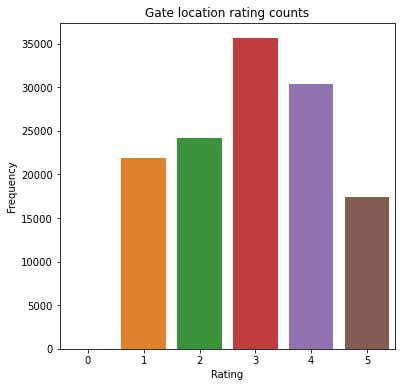

In [53]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Gate location', data = df)
plt.title('Gate location rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x1b4c5957190>,
 [Text(-0.8745044938107908, 0.7468211903158164, '3'),
  Text(-0.7201018597971446, -0.8966344358302851, '4'),
  Text(0.6940739577490782, -0.9169303905829118, '2'),
  Text(1.127823727201013, 0.2247523979013689, '1'),
  Text(0.47006716879237226, 1.0495412601815728, '5'),
  Text(3.150786728338685e-05, 1.2999999996181748, '0')],
 [Text(-0.4942851486756643, 0.4221163249611136, '27.50%'),
  Text(-0.40701409466795124, -0.5067933767736393, '23.46%'),
  Text(0.3923026717712181, -0.5182650033729501, '18.70%'),
  Text(0.637465584939703, 0.12703396403120848, '16.93%'),
  Text(0.26569013888264514, 0.5932189731461063, '13.40%'),
  Text(1.938945678977652e-05, 0.7999999997650307, '0.00%')])

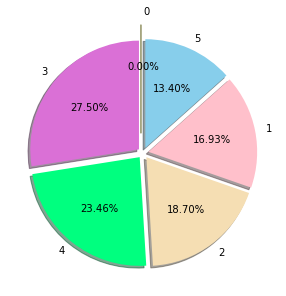

In [54]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Gate location'].value_counts().values,
        labels=df['Gate location'].value_counts().index,
        startangle=90,
        colors=['orchid', 'springgreen', 'wheat', 'pink', 'skyblue','yellow'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Food and drink

In [55]:
df['Food and drink'].value_counts()

4    30477
5    27865
3    27712
2    27293
1    16010
0      130
Name: Food and drink, dtype: int64

Text(0, 0.5, 'Frequency')

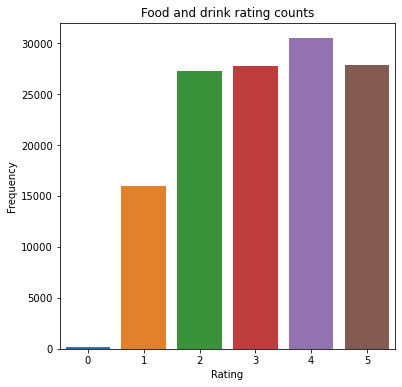

In [56]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Food and drink', data = df)
plt.title('Food and drink rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x1b4c6a6ffa0>,
 [Text(-0.7749452360269262, 0.849682223633737, '4'),
  Text(-0.9593299850741429, -0.6341813460971908, '5'),
  Text(0.40696562037843353, -1.0755830901562171, '3'),
  Text(1.1409632989035248, 0.14388450422191604, '2'),
  Text(0.4422536795223132, 1.0615609652530444, '1'),
  Text(0.004100397873647483, 1.299993533344408, '0')],
 [Text(-0.43801252471087126, 0.4802551698799382, '23.54%'),
  Text(-0.5422299915636459, -0.35845032605493393, '21.52%'),
  Text(0.23002404630085374, -0.6079382683491661, '21.40%'),
  Text(0.6448922993802529, 0.0813260241254308, '21.08%'),
  Text(0.2499694710343509, 0.6000127194908511, '12.36%'),
  Text(0.0025233217683984506, 0.7999960205196355, '0.10%')])

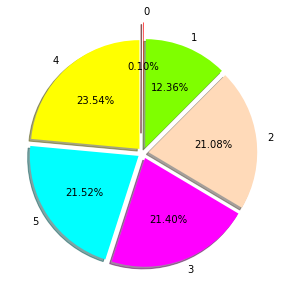

In [57]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Food and drink'].value_counts().values,
        labels=df['Food and drink'].value_counts().index,
        startangle=90,
        colors=['yellow', 'cyan', 'fuchsia', 'peachpuff', 'chartreuse','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')           

### Online boarding

In [58]:
df['Online boarding'].value_counts()

4    38353
3    27040
5    25941
2    21866
1    13216
0     3071
Name: Online boarding, dtype: int64

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

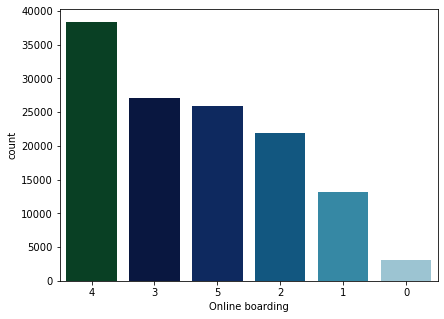

In [59]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Online boarding'], palette='ocean', order=df['Online boarding'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c6b59bb0>,
 [Text(-0.7749452360269262, 0.849682223633737, '4'),
  Text(-0.9593299850741429, -0.6341813460971908, '5'),
  Text(0.40696562037843353, -1.0755830901562171, '3'),
  Text(1.1409632989035248, 0.14388450422191604, '2'),
  Text(0.4422536795223132, 1.0615609652530444, '1'),
  Text(0.004100397873647483, 1.299993533344408, '0')],
 [Text(-0.43801252471087126, 0.4802551698799382, '23.54%'),
  Text(-0.5422299915636459, -0.35845032605493393, '21.52%'),
  Text(0.23002404630085374, -0.6079382683491661, '21.40%'),
  Text(0.6448922993802529, 0.0813260241254308, '21.08%'),
  Text(0.2499694710343509, 0.6000127194908511, '12.36%'),
  Text(0.0025233217683984506, 0.7999960205196355, '0.10%')])

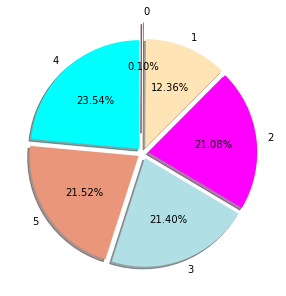

In [60]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Food and drink'].value_counts().values,
        labels=df['Food and drink'].value_counts().index,
        startangle=90,
        colors=['aqua', 'darksalmon', 'powderblue', 'fuchsia', 'moccasin','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')    

### Seat comfort

In [61]:
df['Seat comfort'].value_counts()

4    39651
5    33056
3    23258
2    18462
1    15059
0        1
Name: Seat comfort, dtype: int64

Text(0, 0.5, 'Frequency')

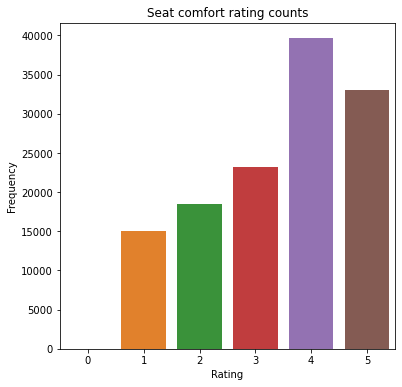

In [62]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Seat comfort', data = df)
plt.title('Seat comfort rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x1b4c8ffe490>,
 [Text(-0.7749452360269262, 0.849682223633737, '4'),
  Text(-0.9593299850741429, -0.6341813460971908, '5'),
  Text(0.40696562037843353, -1.0755830901562171, '3'),
  Text(1.1409632989035248, 0.14388450422191604, '2'),
  Text(0.4422536795223132, 1.0615609652530444, '1'),
  Text(0.004100397873647483, 1.299993533344408, '0')],
 [Text(-0.43801252471087126, 0.4802551698799382, '23.54%'),
  Text(-0.5422299915636459, -0.35845032605493393, '21.52%'),
  Text(0.23002404630085374, -0.6079382683491661, '21.40%'),
  Text(0.6448922993802529, 0.0813260241254308, '21.08%'),
  Text(0.2499694710343509, 0.6000127194908511, '12.36%'),
  Text(0.0025233217683984506, 0.7999960205196355, '0.10%')])

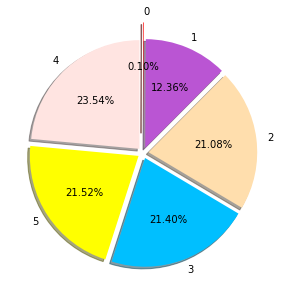

In [63]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Food and drink'].value_counts().values,
        labels=df['Food and drink'].value_counts().index,
        startangle=90,
        colors=['mistyrose', 'yellow', 'deepskyblue', 'navajowhite', 'mediumorchid','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%') 

### Inflight entertainment

In [64]:
df['Inflight entertainment'].value_counts()

4    36682
5    31451
3    23805
2    21897
1    15634
0       18
Name: Inflight entertainment, dtype: int64

<AxesSubplot:xlabel='Inflight entertainment', ylabel='count'>

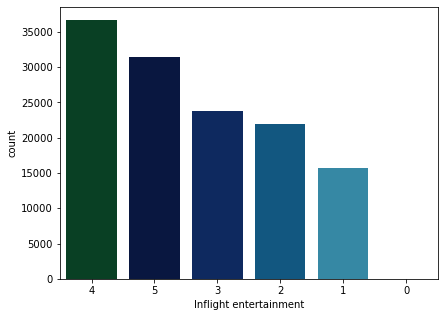

In [65]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Inflight entertainment'], palette='ocean', order=df['Inflight entertainment'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c9330ac0>,
 [Text(-0.8936128146590303, 0.723848145315829, '4'),
  Text(-0.6479980353929006, -0.9500518649668246, '5'),
  Text(0.7771484674609129, -0.8476675406803982, '3'),
  Text(1.1052002911354535, 0.3178558108232557, '2'),
  Text(0.4267538558541396, 1.0678862984951274, '1'),
  Text(0.0005675676097251854, 1.2999998761026896, '0')],
 [Text(-0.5050855039377128, 0.40913156039590337, '28.33%'),
  Text(-0.3662597591351177, -0.536985836720379, '24.29%'),
  Text(0.43925782943442904, -0.4791164360367467, '18.38%'),
  Text(0.6246784254243866, 0.17965763220444886, '16.91%'),
  Text(0.24120870113494844, 0.603587907845072, '12.07%'),
  Text(0.00034927237521549867, 0.7999999237555013, '0.01%')])

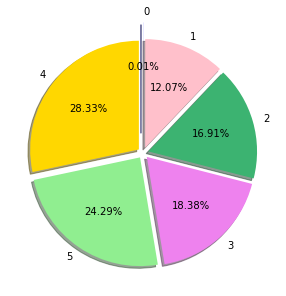

In [66]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Inflight entertainment'].value_counts().values,
        labels=df['Inflight entertainment'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'violet', 'mediumseagreen', 'pink','blue'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### On-board service

In [67]:
df['On-board service'].value_counts()

4    38587
5    29407
3    28460
2    18290
1    14738
0        5
Name: On-board service, dtype: int64

Text(0, 0.5, 'Frequency')

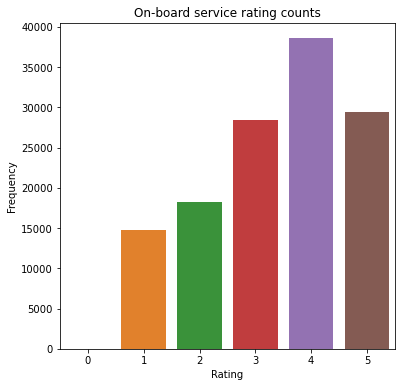

In [68]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'On-board service', data = df)
plt.title('On-board service rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')          

([<matplotlib.patches.Wedge at 0x1b4c9190220>,
 [Text(-0.9261019789148717, 0.6817881816590537, '4'),
  Text(-0.6067095548727474, -0.9769357788647689, '5'),
  Text(0.8626186415402096, -0.7605189539172076, '3'),
  Text(1.0539253212828161, 0.4601536886290412, '2'),
  Text(0.40276128320028654, 1.0771644947522447, '1'),
  Text(0.00015778277304167557, 1.299999990424845, '0')],
 [Text(-0.5234489446040579, 0.3853585374594651, '29.80%'),
  Text(-0.3429227918845963, -0.5521810924018259, '22.71%'),
  Text(0.48756705826185753, -0.4298585391705955, '21.98%'),
  Text(0.59569692072507, 0.2600868674859798, '14.12%'),
  Text(0.2276476818088576, 0.6088321057295296, '11.38%'),
  Text(9.709709110256958e-05, 0.7999999941075968, '0.00%')])

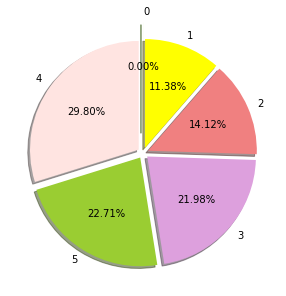

In [69]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['On-board service'].value_counts().values,
        labels=df['On-board service'].value_counts().index,
        startangle=90,
        colors=['mistyrose', 'yellowgreen', 'plum', 'lightcoral', 'yellow','lawngreen'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Leg room service

In [70]:
df['Leg room service'].value_counts()

4    35779
5    30815
3    24982
2    24469
1    12846
0      596
Name: Leg room service, dtype: int64

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

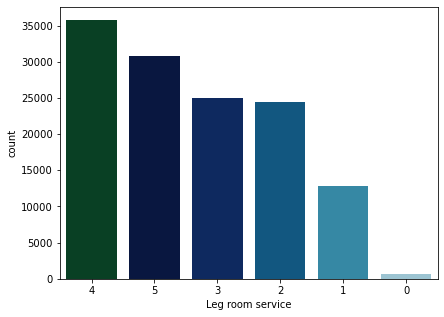

In [71]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Leg room service'], palette='ocean', order=df['Leg room service'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4c926d6d0>,
 [Text(-0.8775412249407555, 0.7432505624145055, '4'),
  Text(-0.7031162569902308, -0.910015125784208, '5'),
  Text(0.7372399749763153, -0.8825968611415532, '3'),
  Text(1.089843053042275, 0.3670723630777635, '2'),
  Text(0.38414717109271324, 1.083942319010318, '1'),
  Text(0.01879732612591624, 1.299864093099935, '0')],
 [Text(-0.4960015619230356, 0.4200981439734161, '27.63%'),
  Text(-0.3974135365596957, -0.5143563754432479, '23.80%'),
  Text(0.4167008554213955, -0.49885909542783435, '19.29%'),
  Text(0.6159982473717206, 0.20747568347873582, '18.90%'),
  Text(0.21712666192196833, 0.612663049875397, '9.92%'),
  Text(0.011567585308256146, 0.7999163649845753, '0.46%')])

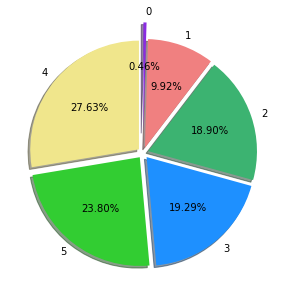

In [72]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Leg room service'].value_counts().values,
        labels=df['Leg room service'].value_counts().index,
        startangle=90,
        colors=['khaki', 'limegreen', 'dodgerblue', 'mediumseagreen', 'lightcoral','blueviolet'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Baggage handling	

In [73]:
df['Baggage handling'].value_counts()

4    46631
5    33761
3    25771
2    14316
1     9008
Name: Baggage handling, dtype: int64

Text(0, 0.5, 'Frequency')

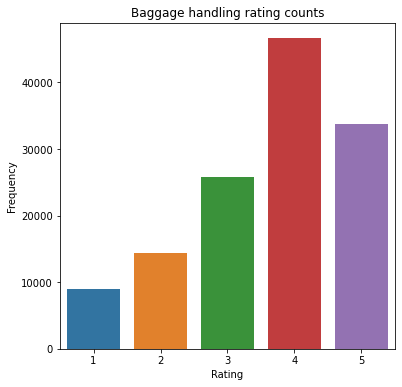

In [74]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Baggage handling', data = df)
plt.title('Baggage handling rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')  

([<matplotlib.patches.Wedge at 0x1b4ca36c1c0>,
 [Text(-1.0407373211393234, 0.4892502717298633, '4'),
  Text(-0.06870738408409575, -1.1479456848528682, '5'),
  Text(1.1301173980472607, -0.2129193899833673, '3'),
  Text(0.8123881945240036, 0.8139566458958549, '2'),
  Text(0.28185946450284094, 1.2690765312896508, '1')],
 [Text(-0.5882428336874436, 0.2765327622820966, '36.01%'),
  Text(-0.038834608395358475, -0.6488388653516212, '26.07%'),
  Text(0.63876200759193, -0.12034574216451192, '19.90%'),
  Text(0.45917593603530626, 0.4600624520280919, '11.06%'),
  Text(0.17345197815559443, 0.7809701731013234, '6.96%')])

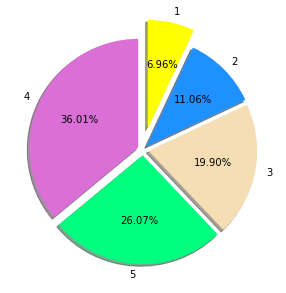

In [75]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Baggage handling'].value_counts().values,
        labels=df['Baggage handling'].value_counts().index,
        startangle=90,
        colors=['orchid', 'springgreen', 'wheat', 'dodgerblue','yellow'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

### Checkin service

In [76]:
df['Checkin service'].value_counts()

4    36229
3    35343
5    25800
1    16058
2    16056
0        1
Name: Checkin service, dtype: int64

<AxesSubplot:xlabel='Checkin service', ylabel='count'>

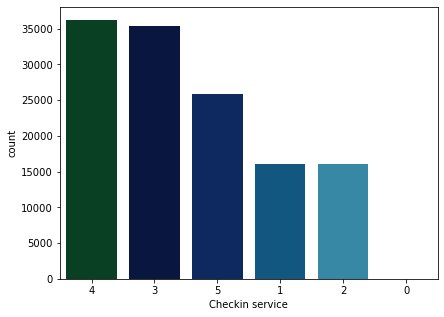

In [77]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Checkin service'], palette='ocean', order=df['Checkin service'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4ca43dc40>,
 [Text(-0.8856034363488787, 0.7336256221854972, '4'),
  Text(-0.5775312169192759, -0.9944635204389052, '3'),
  Text(0.9402857065133888, -0.6620897145603589, '5'),
  Text(1.0582975543060493, 0.4500069850011602, '1'),
  Text(0.4367874875187361, 1.0638217382376947, '2'),
  Text(3.1447009891922926e-05, 1.2999999996196483, '0')],
 [Text(-0.5005584640232792, 0.4146579603657157, '27.98%'),
  Text(-0.32643068782393847, -0.5620880767698159, '27.29%'),
  Text(0.5314658341162631, -0.37422462127324624, '19.92%'),
  Text(0.5981681828686366, 0.2543517741310905, '12.40%'),
  Text(0.24687988424972035, 0.6012905476995665, '12.40%'),
  Text(1.9352006087337184e-05, 0.7999999997659375, '0.00%')])

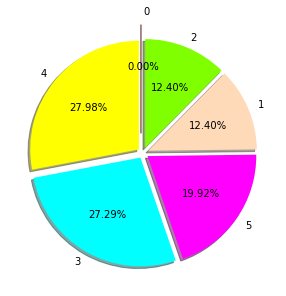

In [78]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Checkin service'].value_counts().values,
        labels=df['Checkin service'].value_counts().index,
        startangle=90,
        colors=['yellow', 'cyan', 'fuchsia', 'peachpuff', 'chartreuse','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%') 

### Inflight service

In [79]:
df['Inflight service'].value_counts()

4    47198
5    33962
3    25232
2    14252
1     8838
0        5
Name: Inflight service, dtype: int64

Text(0, 0.5, 'Frequency')

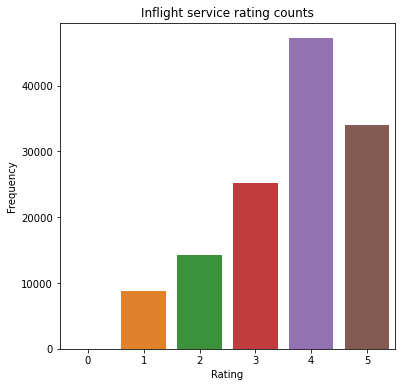

In [80]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Inflight service', data = df)
plt.title('Inflight service rating counts')
plt.xlabel('Rating')
plt.ylabel('Frequency')  

([<matplotlib.patches.Wedge at 0x1b4ca51adc0>,
 [Text(-0.8856034363488787, 0.7336256221854972, '4'),
  Text(-0.5775312169192759, -0.9944635204389052, '3'),
  Text(0.9402857065133888, -0.6620897145603589, '5'),
  Text(1.0582975543060493, 0.4500069850011602, '1'),
  Text(0.4367874875187361, 1.0638217382376947, '2'),
  Text(3.1447009891922926e-05, 1.2999999996196483, '0')],
 [Text(-0.5005584640232792, 0.4146579603657157, '27.98%'),
  Text(-0.32643068782393847, -0.5620880767698159, '27.29%'),
  Text(0.5314658341162631, -0.37422462127324624, '19.92%'),
  Text(0.5981681828686366, 0.2543517741310905, '12.40%'),
  Text(0.24687988424972035, 0.6012905476995665, '12.40%'),
  Text(1.9352006087337184e-05, 0.7999999997659375, '0.00%')])

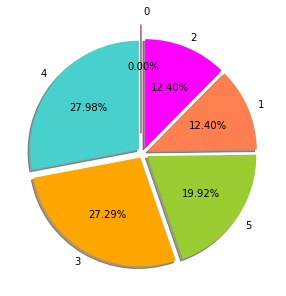

In [81]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Checkin service'].value_counts().values,
        labels=df['Checkin service'].value_counts().index,
        startangle=90,
        colors=['mediumturquoise', 'orange', 'yellowgreen', 'coral', 'magenta','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%') 

### Cleanliness

In [82]:
df['Cleanliness'].value_counts()

4    33871
3    30552
5    28321
2    20049
1    16680
0       14
Name: Cleanliness, dtype: int64

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

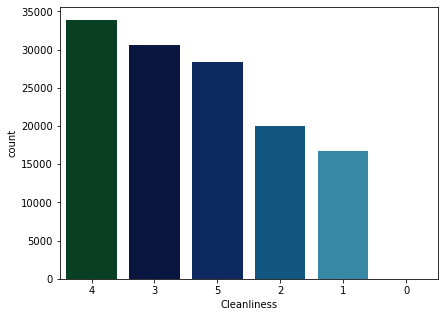

In [83]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(132)
sns.countplot(df['Cleanliness'], palette='ocean', order=df['Cleanliness'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1b4ca6231c0>,
 [Text(-0.8422071777831274, 0.7830626218193406, '4'),
  Text(-0.7895878312455022, -0.8360927321469936, '3'),
  Text(0.7155460711913079, -0.9002743026448573, '5'),
  Text(1.107002184155499, 0.3115223335091001, '2'),
  Text(0.4535092700856809, 1.056801467611752, '1'),
  Text(0.0004415970075105731, 1.299999924996953, '0')],
 [Text(-0.47603014396437626, 0.4426006123326708, '26.16%'),
  Text(-0.44628877418224033, -0.47257415295264854, '23.59%'),
  Text(0.4044390837168261, -0.5088506927992671, '21.87%'),
  Text(0.6256968866965863, 0.17607784067905655, '15.48%'),
  Text(0.25633132657016744, 0.5973225686501207, '12.88%'),
  Text(0.00027175200462189114, 0.7999999538442787, '0.01%')])

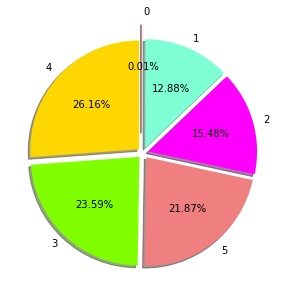

In [84]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['Cleanliness'].value_counts().values,
        labels=df['Cleanliness'].value_counts().index,
        startangle=90,
        colors=['gold', 'chartreuse', 'lightcoral', 'magenta', 'aquamarine','red'],
        explode=[0.05,0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%') 

### Departure Delay in Minutes

In [85]:
df['Departure Delay in Minutes'].describe()

count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

Text(0.5, 1.0, 'Departure Delay in Minutes')

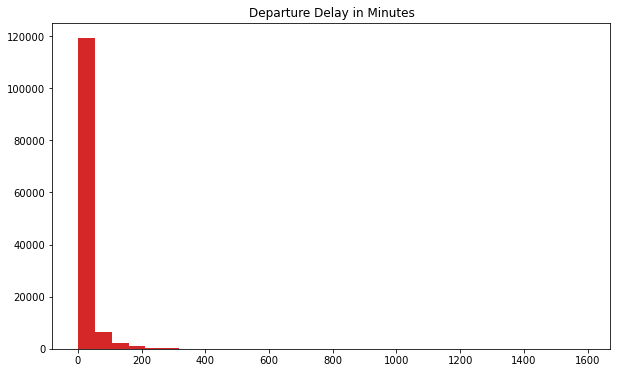

In [86]:
df['Departure Delay in Minutes'].hist(grid=False,
       figsize=(10, 6),color='tab:red',
       bins=30)
plt.title('Departure Delay in Minutes')

<AxesSubplot:xlabel='Departure Delay in Minutes'>

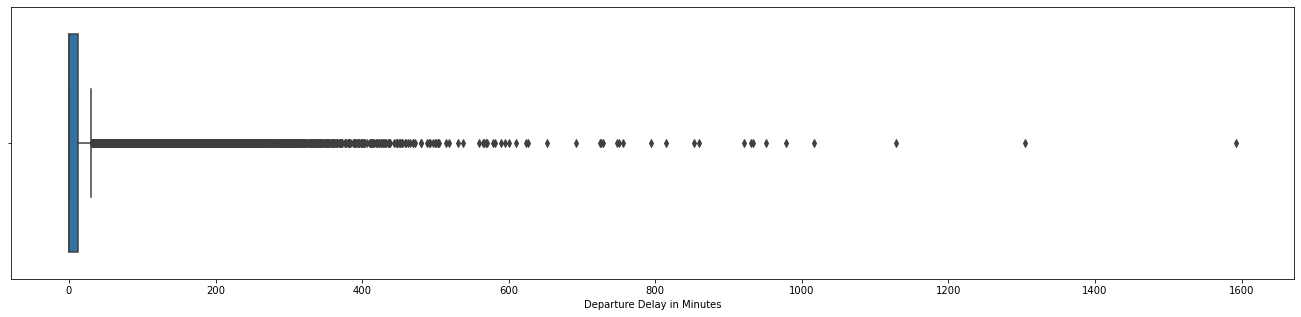

In [87]:
sns.boxplot(df['Departure Delay in Minutes'])

### Arrival Delay in Minutes

In [88]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Text(0.5, 1.0, 'Arrival Delay in Minutes')

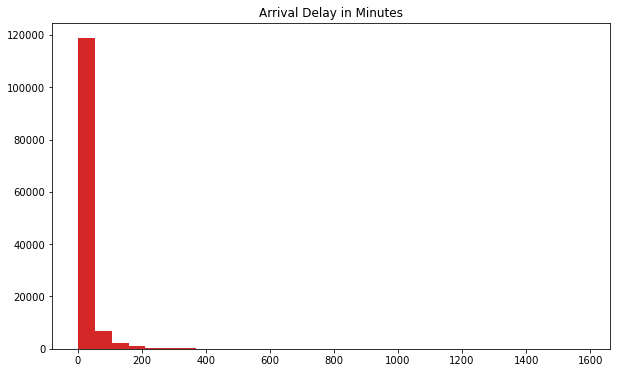

In [89]:
df['Arrival Delay in Minutes'].hist(grid=False,
       figsize=(10, 6),color='tab:red',
       bins=30)
plt.title('Arrival Delay in Minutes')

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

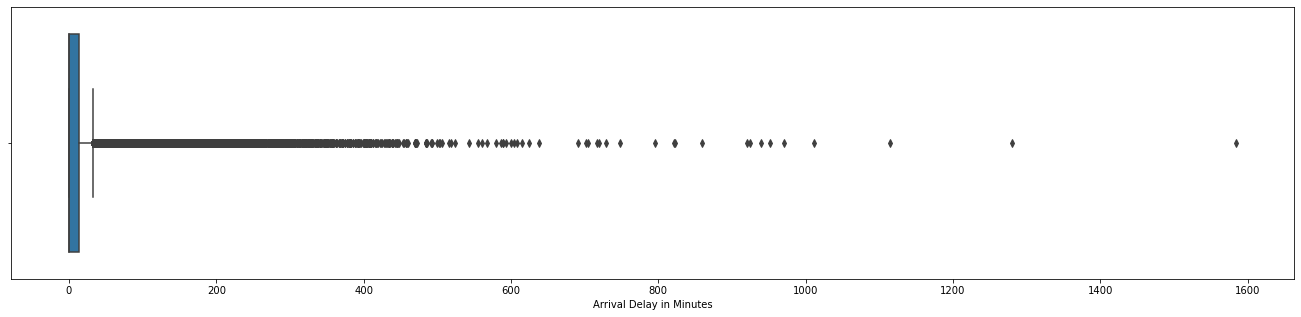

In [90]:
sns.boxplot(df['Arrival Delay in Minutes'])

## Bivariate Analysis

#### Age and satisfaction

In [91]:
# Finding the average Age for satisaction groups
df.groupby("satisfaction").agg({'Age':'mean'})

,Age
satisfaction,
0,37.653069
1,41.739824


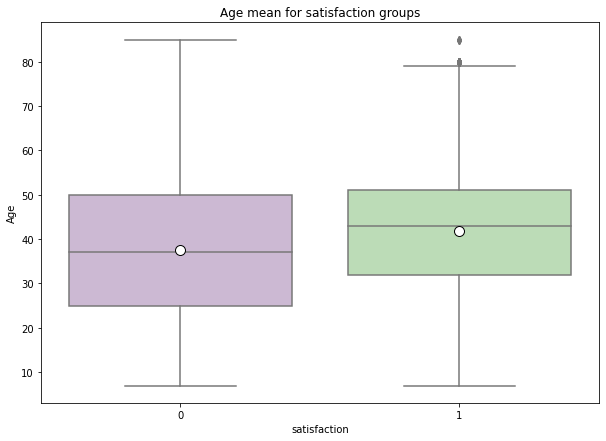

In [92]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='satisfaction', y='Age', data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, palette='PRGn').set_title('Age mean for satisfaction groups')
plt.show()

#### Flight Distance and satisfaction

In [93]:
# Finding the average Flight Distance for satisaction groups
df.groupby("satisfaction").agg({'Flight Distance':'mean'})

,Flight Distance
satisfaction,
0,929.456333
1,1529.582454


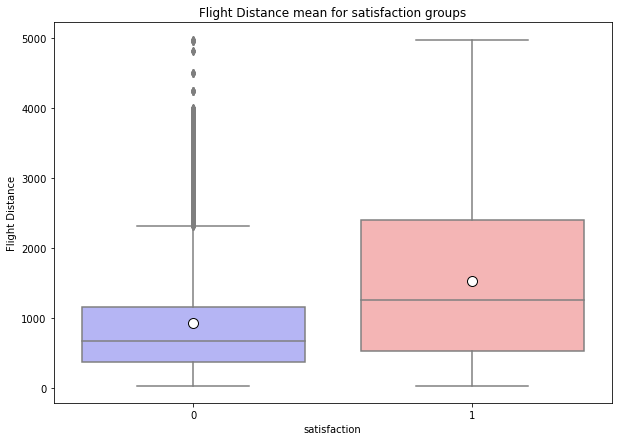

In [94]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='satisfaction', y='Flight Distance', data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, palette='bwr').set_title('Flight Distance mean for satisfaction groups')
plt.show()

#### Departure Delay in Minutes and satisfaction

In [95]:
# Finding the average Departure Delay in Minutes for satisaction groups
df.groupby("satisfaction").agg({'Departure Delay in Minutes':'mean'})

,Departure Delay in Minutes
satisfaction,
0,16.340184
1,12.435001


Text(0.5, 1.0, 'Departure Delay in Minutes mean for satisfaction groups')

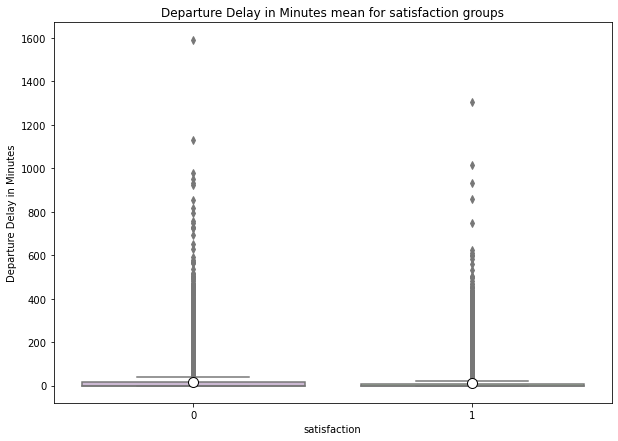

In [96]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, palette='PRGn').set_title('Departure Delay in Minutes mean for satisfaction groups')

#### Arrival Delay in Minutes and satisfaction

In [97]:
df.groupby("satisfaction").agg({'Arrival Delay in Minutes':'mean'})

,Arrival Delay in Minutes
satisfaction,
0,17.055992
1,12.533859


Text(0.5, 1.0, 'Arrival Delay in Minutes mean for satisfaction groups')

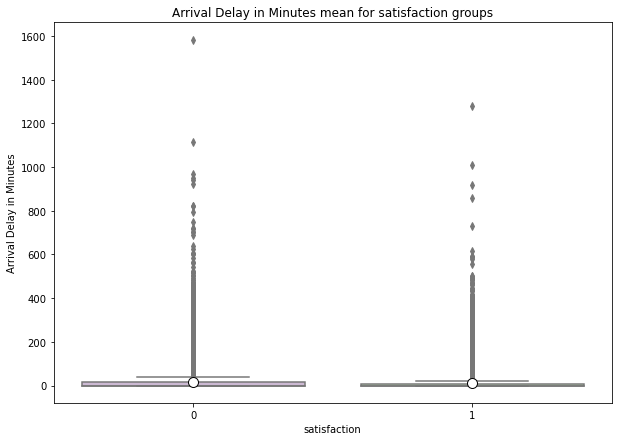

In [98]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, palette='PRGn').set_title('Arrival Delay in Minutes mean for satisfaction groups')

#### Customer Type and satisfaction

In [99]:
# Getting percentages for crosstable of Customer Type vs. satisfaction
pd.crosstab(df['Customer Type'],df.satisfaction, normalize='index')\
    .round(4)*100

satisfaction,0,1
Customer Type,,
Loyal Customer,52.19,47.81
disloyal Customer,76.01,23.99


In [100]:
pd.crosstab(df.satisfaction,df['Customer Type'], normalize='index')\
    .round(4)*100

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
0,75.38,24.62
1,89.89,10.11


#### Type of Travel and satisfaction

In [101]:
# Getting percentages for crosstable of Type of Travel vs. satisfaction
pd.crosstab(df['Type of Travel'],df.satisfaction, normalize='index')\
    .round(4)*100

satisfaction,0,1
Type of Travel,,
Business travel,41.63,58.37
Personal Travel,89.87,10.13


In [102]:
pd.crosstab(df.satisfaction,df['Type of Travel'], normalize='index')\
    .round(4)*100

Type of Travel,Business travel,Personal Travel
satisfaction,,
0,50.85,49.15
1,92.79,7.21


#### Class and satisfaction

In [103]:
# Getting percentages for crosstable of Class vs. satisfaction
pd.crosstab(df['Class'],df.satisfaction, normalize='index')\
    .round(4)*100

satisfaction,0,1
Class,,
Business,30.55,69.45
Eco,81.24,18.76
Eco Plus,75.37,24.63


Using the numbers in the table above, we can take a closer look at the combination of "neutral and dissatisfied' and "satisfied" customers across classes:

We already know that 47.87% of customers fall in Business class, 44.88% fall in Eco class and 7.24% fall in Eco Plus class. If we multiply these numbers by the corresponding numbers in under column 0 in the above table, we can see that out of 56.55% "neutral or dissatisfied" customers 36.46% (44.88% * 81.24%) come from Eco class, 14.62% come from business class and only 5.65% belong to Eco Plus class.

Also, out of 43.45% of satisfied customers, 33.25% (47.87% * 69.45%) belong to Business class, 8.42% come from Eco class and 1.8% come from Eco Plus class.


In [104]:
pd.crosstab(df.satisfaction,df['Class'], normalize='index')\
    .round(4)*100

Class,Business,Eco,Eco Plus
satisfaction,,,
0,25.87,64.48,9.66
1,76.52,19.38,4.11


#### Customer Type and Type of Travel

In [105]:
# Getting percentages for crosstable of Customer Type vs. Type of Travel
pd.crosstab(df['Customer Type'],df['Type of Travel'], normalize='index')\
    .round(4)*100

Type of Travel,Business travel,Personal Travel
Customer Type,,
Loyal Customer,62.33,37.67
disloyal Customer,99.16,0.84


In [106]:
pd.crosstab(df['Type of Travel'],df['Customer Type'], normalize='index')\
    .round(4)*100

Customer Type,Loyal Customer,disloyal Customer
Type of Travel,,
Business travel,73.71,26.29
Personal Travel,99.50,0.50


#### Customer Type and Class

In [107]:
# Getting percentages for crosstable of Customer Type vs. Class
pd.crosstab(df['Customer Type'],df['Class'], normalize='index')\
    .round(4)*100

Class,Business,Eco,Eco Plus
Customer Type,,,
Loyal Customer,49.90,42.09,8.01
disloyal Customer,38.84,57.32,3.85


In [108]:
pd.crosstab(df['Class'],df['Customer Type'], normalize='index')\
    .round(4)*100

Customer Type,Loyal Customer,disloyal Customer
Class,,
Business,85.14,14.86
Eco,76.61,23.39
Eco Plus,90.28,9.72


# One-hot encoding

In [109]:
# Making a copy of df
df_orginal2=df.copy()

In [110]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,0,0,0


In [111]:
#Defining X and y by removing target
X = df.drop('satisfaction', axis = 1)
y = df['satisfaction']

In [112]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
43170,27,1744,0,5,0,2,4,0,4,4,...,4,4,4,0,0.0,1,0,1,1,0
21338,47,107,5,3,3,3,2,5,4,5,...,1,5,1,0,0.0,0,0,0,1,0
28463,47,2878,2,2,2,2,3,5,5,4,...,4,4,5,0,0.0,1,0,0,0,0
20300,49,2077,2,3,2,3,4,4,3,1,...,2,1,2,0,0.0,0,0,1,1,0
39398,25,1389,1,0,1,5,2,1,2,2,...,4,5,2,0,0.0,0,1,0,0,0


In [113]:
y_test.head()

43170    1
21338    1
28463    1
20300    0
39398    0
Name: satisfaction, dtype: int64

### Scaling

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report

In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [118]:
# Creating an instance
DT = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [119]:
y_pred = DT.predict(X_test_scaled)

In [120]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9053594872190903
0.8908775210364632


In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14674
           1       0.89      0.89      0.89     11224

    accuracy                           0.91     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.91      0.91      0.91     25898



### Hyperparameter Tuning 

#### Finding the best max_depth

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
scores = []
for i in range(1,15):
    dt = DecisionTreeClassifier(max_depth=i)
    scores.append(cross_val_score(dt,X,y,cv=4,scoring='f1').mean())

Text(0.5, 1.0, 'Finding optimal max_depth')

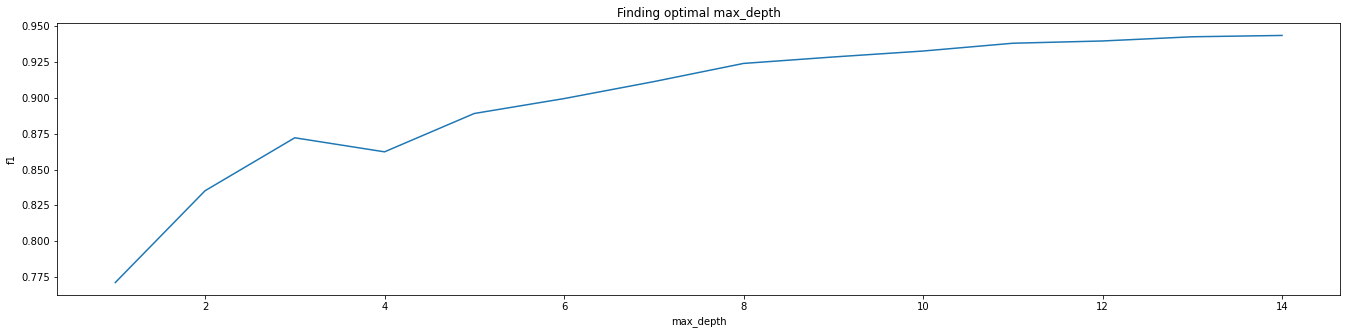

In [124]:
plt.plot(range(1,15),scores)
plt.xlabel("max_depth")
plt.ylabel("f1")
plt.title("Finding optimal max_depth")

In [125]:
DT =DecisionTreeClassifier(class_weight='balanced',)
params= {'criterion':['gini','entropy'],'max_depth':[8,9,10],'min_samples_split':[3,4,5,6],'min_samples_leaf':[2,3,4]}
Model1=RandomizedSearchCV(DT,param_distributions=params,cv=5,scoring='f1')
Model1.fit(X_train_scaled,y_train)
Model1.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'gini'}

In [127]:
"""K-FOLD CROSSVALIDATION"""
DT = DecisionTreeClassifier(criterion='gini',
                                max_depth=10,
                                min_samples_leaf= 4,
                                min_samples_split= 3)
scores=cross_val_score(DT,X,y,cv=5,scoring='f1')
DT_WB_f1score=scores.mean()
DT_WB_f1score

0.9339542083613412

In [128]:
DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=3)

In [129]:
y_pred = DT.predict(X_test_scaled)

### Model Evaluation

In [130]:
print(accuracy_score(y_train,DT.predict(X_train_scaled)))
print(f1_score(y_train,DT.predict(X_train_scaled)))

0.9466256069659906
0.9372424830592161


In [131]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9428527299405359
0.93247559083858


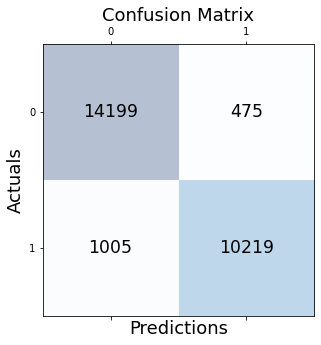

In [132]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14674
           1       0.96      0.91      0.93     11224

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



## Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
# Creating an instance
RF=RandomForestClassifier(max_depth=5,n_estimators=20,random_state=0)

In [136]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=0)

In [137]:
y_pred2 =RF.predict(X_test_scaled)

In [138]:
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9227739593791027
0.9100638546631892


### Hyperparameter Tuning

#### Finding the best max_depth

In [139]:
scores = []
for i in range(1,14):
    dt = RandomForestClassifier(max_depth=i,n_estimators=20,random_state=0)
    scores.append(cross_val_score(dt,X,y,cv=4,scoring='f1').mean())

Text(0.5, 1.0, 'Finding optimal max_depth')

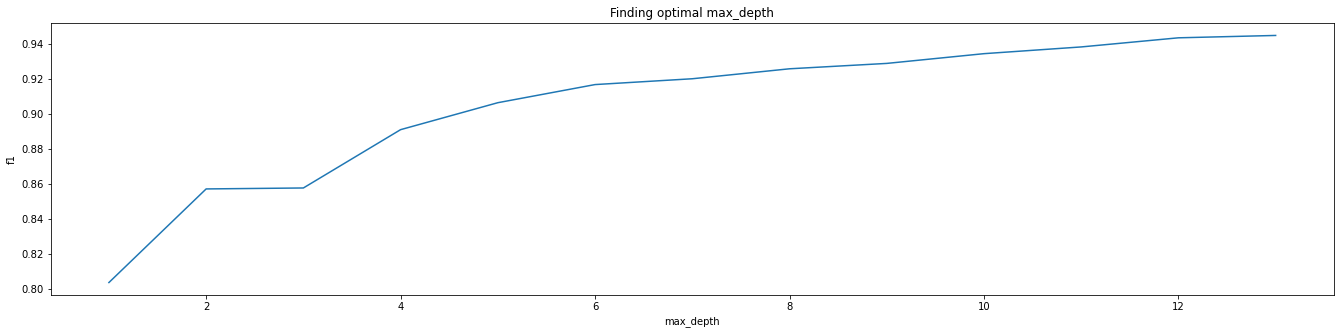

In [140]:
plt.plot(range(1,14),scores)
plt.xlabel("max_depth")
plt.ylabel("f1")
plt.title("Finding optimal max_depth")

In [141]:
RF=RandomForestClassifier(class_weight='balanced',random_state=0)
param_grid={'n_estimators':range(10,110,10),'max_depth':[8,9,10],'min_samples_split':[3,5],'criterion':['gini','entropy']}
Model2=RandomizedSearchCV(RF,param_distributions=param_grid,cv=5,scoring='f1')
Model2.fit(X_train_scaled,y_train)
Model2.best_params_

{'n_estimators': 10,
 'min_samples_split': 3,
 'max_depth': 10,
 'criterion': 'gini'}

In [143]:
RF = RandomForestClassifier(
    criterion='gini',n_estimators = 20, max_depth = 10, min_samples_split = 3)

In [144]:
"""K-FOLD CROSSVALIDATION"""
scores=cross_val_score(RF,X,y,cv=5,scoring='f1')
RF_WB_f1score=scores.mean()
RF_WB_f1score

0.9337255748190545

In [145]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=20)

In [146]:
y_pred2 =RF.predict(X_test_scaled)

In [147]:
print(accuracy_score(y_train,RF.predict(X_train_scaled)))
print(f1_score(y_train,RF.predict(X_train_scaled)))

0.9490582976957013
0.9409698529000504


In [148]:
print(accuracy_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9457487064638196
0.9369926902551684


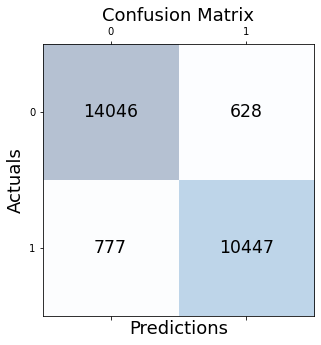

In [149]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [150]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14674
           1       0.94      0.93      0.94     11224

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.94     25898
weighted avg       0.95      0.95      0.95     25898



## AdaBoost

In [151]:
from sklearn.ensemble import AdaBoostClassifier

In [152]:
# Creating an instance
ADA= AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=40,random_state=0)

In [153]:
ADA.fit(X_train_scaled,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=40, random_state=0)

In [154]:
y_pred3 =ADA.predict(X_test_scaled)

In [155]:
print(accuracy_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9556722526836049
0.9484785925859439


### Hyperparameter Tuning

In [156]:
ADA=AdaBoostClassifier(random_state=0)
param_grid={'n_estimators':range(10,110,10),'learning_rate': [0.01, 0.05, 0.1, 1],}
model3=RandomizedSearchCV(ADA,param_grid,cv=5,scoring='f1')
model3.fit(X_train_scaled,y_train)
model3.best_params_

{'n_estimators': 100, 'learning_rate': 1}

In [158]:
ADA = AdaBoostClassifier(
    n_estimators= 80, learning_rate= 0.8)

In [159]:
"""K-FOLD CROSSVALIDATION"""
ADA=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=80,learning_rate= 0.8, random_state=0)
scores=cross_val_score(ADA,X,y,cv=5)
ADA_WB_score=scores.mean()
ADA_WB_score

0.9555013465681377

In [160]:
ADA.fit(X_train_scaled,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=80, random_state=0)

In [161]:
y_pred3 =ADA.predict(X_test_scaled)

In [162]:
print(accuracy_score(y_train,ADA.predict(X_train_scaled)))
print(f1_score(y_train,ADA.predict(X_train_scaled)))

0.9579588566353571
0.9511634426689095


In [163]:
print(accuracy_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9573326125569542
0.950276740314089


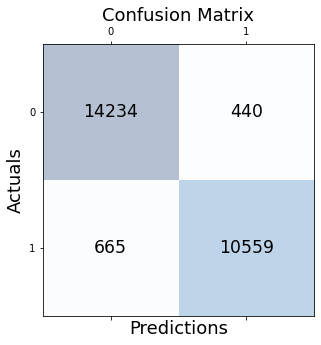

In [164]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred3)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [165]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14674
           1       0.96      0.94      0.95     11224

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



## XGBoost

In [166]:
from xgboost import XGBClassifier

In [167]:
XGB = XGBClassifier(eval_metric='logloss')

In [168]:
XGB.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
y_pred4 =XGB.predict(X_test_scaled)

In [170]:
print(accuracy_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))

0.9644760213143873
0.9583936324167872


### Hyperparameter Tuning

In [171]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [172]:
random_search=RandomizedSearchCV(XGB,param_distributions=params,n_iter=5,scoring='f1',cv=5,verbose=3)

In [174]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0.3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [241]:
XGB=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0.4,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=80, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [242]:
"""K-FOLD CROSSVALIDATION"""
score=cross_val_score(XGB,X,y,cv=5)
score.mean()

0.9630464962403427

In [243]:
XGB.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0.4,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [244]:
y_pred4 =XGB.predict(X_test_scaled)

In [245]:
print(accuracy_score(y_train,XGB.predict(X_train_scaled)))
print(f1_score(y_train,XGB.predict(X_train_scaled)))

0.970074042610702
0.9649780830584301


In [246]:
print(accuracy_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))

0.9637423739284887
0.9573317580769755


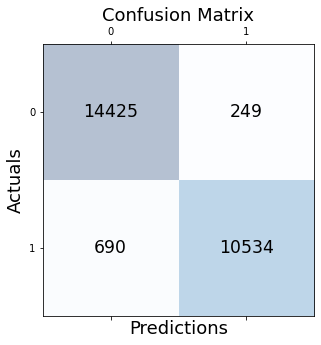

In [247]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred4)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [248]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14674
           1       0.98      0.94      0.96     11224

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



Both XGBoost and AdaBoost outperform Decision Tree and Random Forest. However, XGBoost does (a little) better job than AdaBoost;  So, we will check the feature importance for our best model (XGBoost):

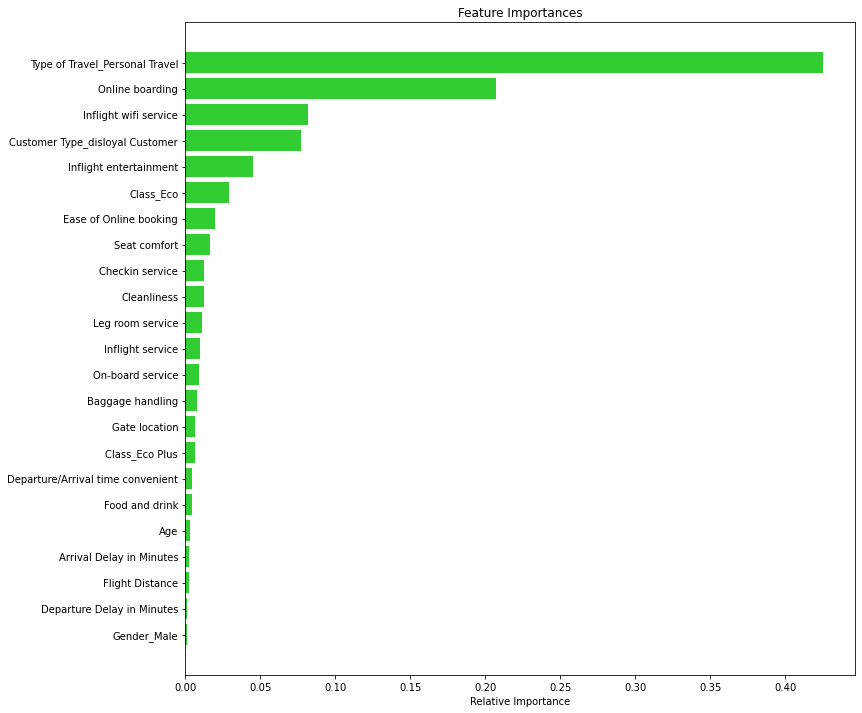

In [250]:
feature_names = X_train.columns
importances = XGB.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="limegreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()